In [30]:
from lightkurve import TessLightCurve
from lightkurve.search import open 
from lightkurve.correctors import RegressionCorrector
import lightkurve as lk
import numpy as np

In [43]:
def findOrbitRadius(periodInDays, M):
    G = 6.67408 * (10 ** (-11))
    pi = 3.141592653589
    sunMassKG = 1.989 * (10**30)
    massKG = M * sunMassKG
    periodInSec = periodInDays * 24 * 3600
    return ((periodInSec * periodInSec*G*massKG)/4*pi*pi) ** (1. / 3)
def metersToAU(d):
    return d/(1.495978707*(10**11))

def removeHighFreq(lc):
    winLength = int(0.01 * len(lc.flux))
    if winLength % 2 == 0: winLength+=1
    return lc.flatten(window_length=winLength)
def removeLowFreq(lc):
    winLength = int(0.5 * len(lc.flux))
    if winLength % 2 == 0: winLength+=1
    return lc.flatten(window_length=winLength)
def preprocessFlux(lc):
    gold_lc = lc.remove_nans().remove_outliers(sigma=6)
    norm_lc = gold_lc.normalize()
    flat_lc = removeLowFreq(removeHighFreq(norm_lc))
    return gold_lc, flat_lc
    

In [44]:
#pixels = open("TIC165602000/tess2019226182529-s0015-0000000165602000-0151-s_tp.fits")
#pixels.interact()
#lc.query_solar_system_objects()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

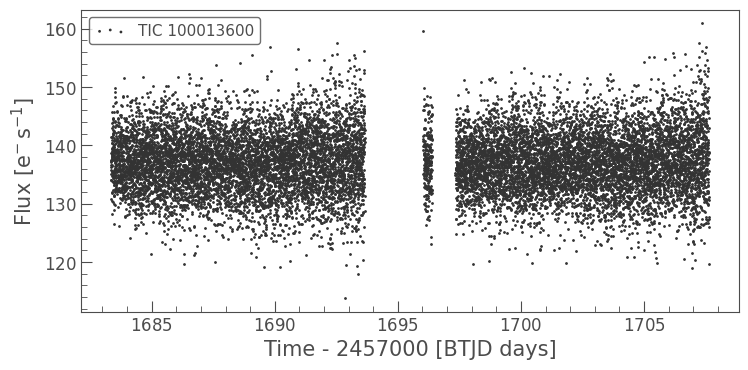

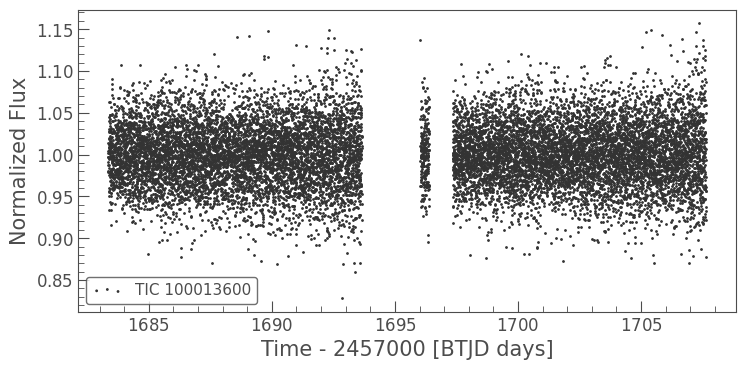

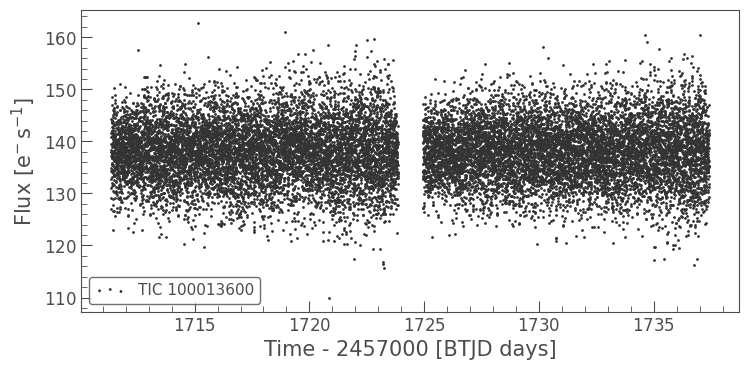

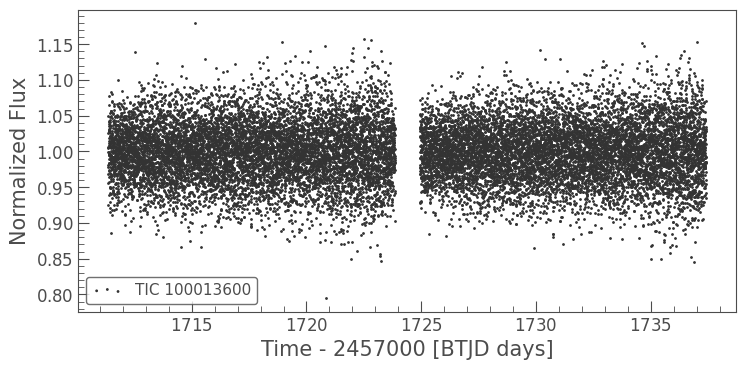

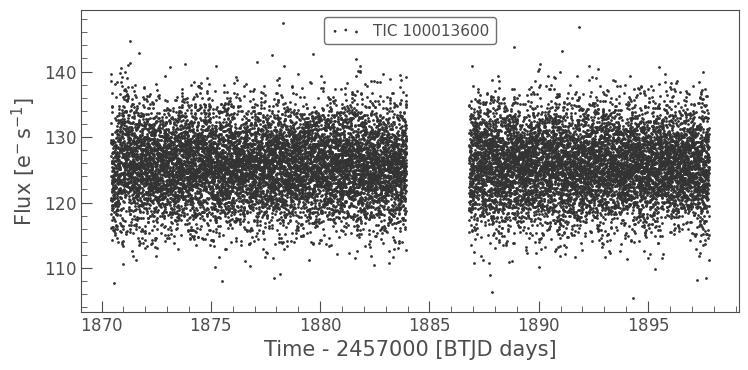

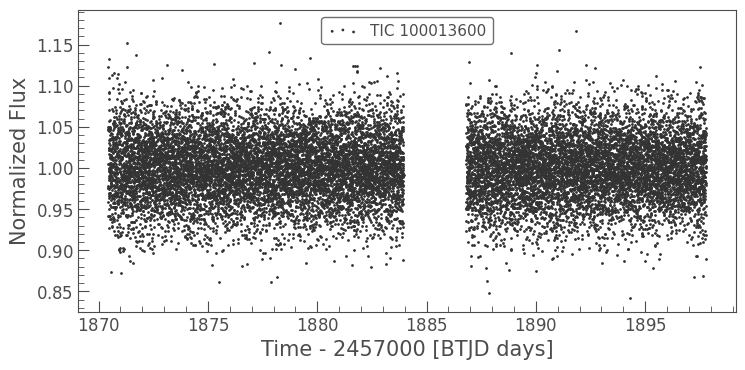

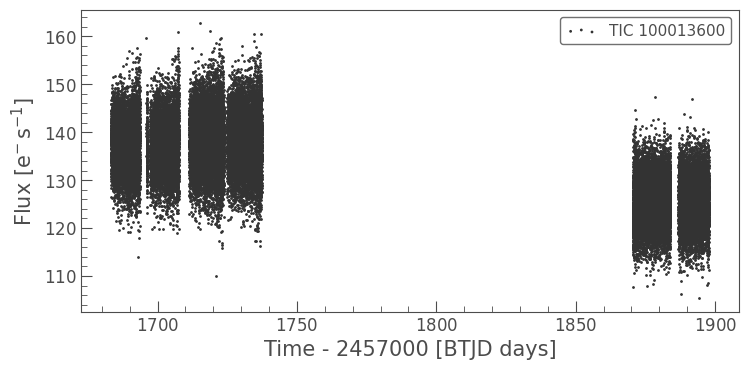

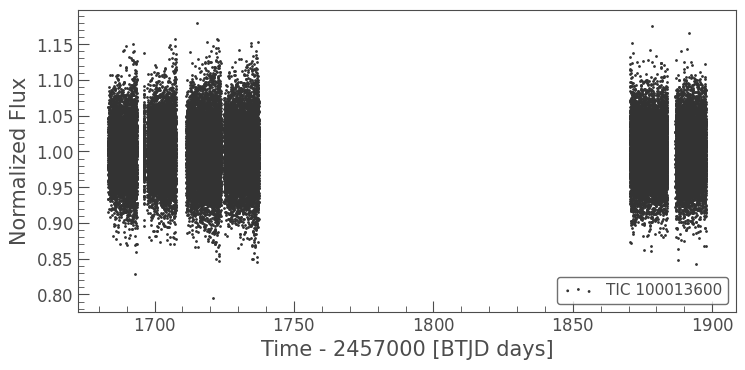

In [45]:
lc1 = open("TIC 100013600/tess2019198215352-s0014-0000000100013600-0150-s_lc.fits").PDCSAP_FLUX
lc2 = open("TIC 100013600/tess2019226182529-s0015-0000000100013600-0151-s_lc.fits").PDCSAP_FLUX
lc3 = open("TIC 100013600/tess2020020091053-s0021-0000000100013600-0167-s_lc.fits").PDCSAP_FLUX
lc1_gold, lc1_flat = preprocessFlux(lc1)
lc2_gold, lc2_flat = preprocessFlux(lc2)
lc3_gold, lc3_flat = preprocessFlux(lc3)
lc_gold = lc1_gold.append(lc2_gold).append(lc3_gold)
lc_flat = lc1_flat.append(lc2_flat).append(lc3_flat)
lc1_gold.scatter()
lc1_flat.scatter()
lc2_gold.scatter()
lc2_flat.scatter()
lc3_gold.scatter()
lc3_flat.scatter()
lc_gold.scatter()
lc_flat.scatter()

TIC 100013600 : Folding on period  0.33


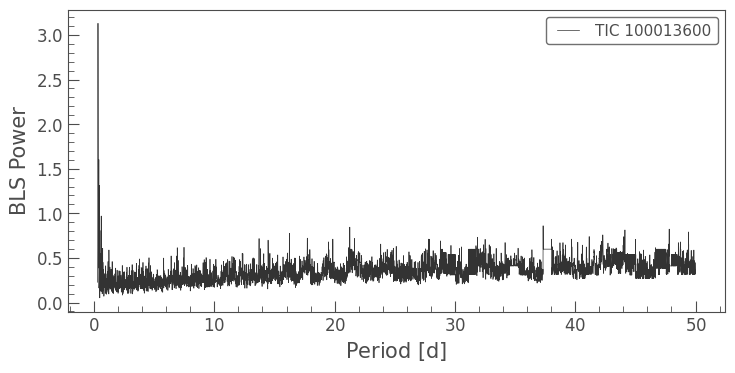

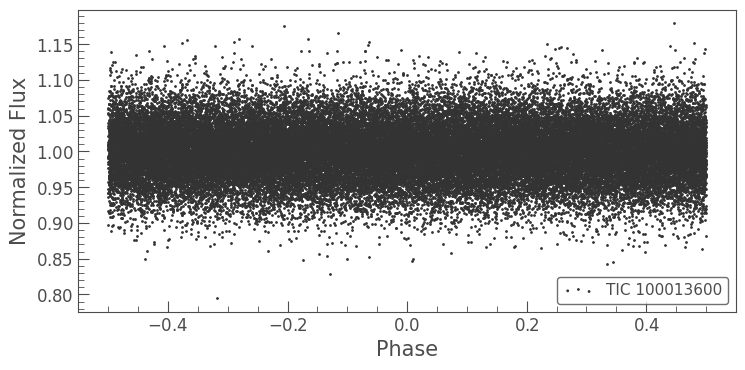

In [46]:
pg = lc_flat.to_periodogram(method="bls", period=np.arange(0.3, 50, 0.01))
lc_fold = lc_flat.fold(period=pg.period_at_max_power)

pg.plot();
lc_fold.scatter()
print(lc_flat.label, ": Folding on period ",lc_fold.period)